In [1]:
from collections import Counter
import torchvision as tv
from matplotlib import pyplot as plt
import numpy as np
import torchvision.transforms.functional as F
import os
import sys
np.random.seed(0)
path2add = os.path.abspath('..')
if path2add not in sys.path:
    sys.path.append(path2add)

In [ ]:
from maskaugfish import dataloader
from maskaugfish import augmentation

In [3]:
augmentation_path = "..\\demo\\augmentation_example.json"
data_path = "../data"
augmentation_pipeline = augmentation.Augmentation(config_file=augmentation_path,
                                     regime="background-only",)

In [4]:
samples, class_to_id = dataloader.build_index(data_path)
ys_all = [s[2] for s in samples]
freq_all = dict(sorted(Counter(ys_all).items()))
train_loader, val_loader, test_loader = dataloader.make_dataloaders(
    samples=samples,
    batch_size=256,
    num_workers=4,
    img_size=128,
    weighted_train=True,
    seed=42,
    test_ratio=0.1,
    n_splits=5,
    fold_id=0,
    augment_pipeline=augmentation_pipeline,
)

In [5]:
batch = next(iter(train_loader))

c:\Users\kxk975\Documents\GitHub\MaskAugFish\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [6]:
batch.keys()

dict_keys(['image', 'label', 'path', 'mask'])

In [7]:
batch['image'][0:3].shape

torch.Size([3, 3, 128, 128])

In [8]:
def show_image(img, title="Image"):
    plt.imshow(tv.transforms.functional.to_pil_image(img))
    plt.title(title)
    plt.axis('off')
    plt.show()


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

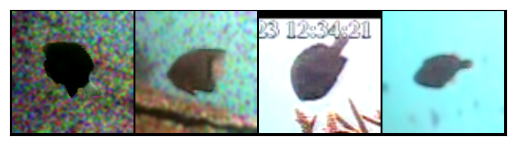

In [9]:
image_list = []
for i in range(4):
    image_list.append(batch['image'][i])
grid = tv.utils.make_grid(image_list, nrow=4)
show(grid)